## 2-3. データの全体概要をチェックする

In [44]:
import pandas as pd
import numpy as np

# 可視化
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

sns.set(context="notebook",
        font="Hiragino Maru Gothic Pro")


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)

In [2]:
def load_excel_file_into_data_frame(sheet, skiprows, cols):
    # skiprows:先頭の何行を読み込まないかを指定する引数
    # skip_footer:最後の何行を読み込まないか指定する引数
    # usecols:読み込む列を指定
    df = xls.parse(sheet,
                            skiprows = skiprows,
                            usecols = cols
                  )
    # 全ての行がNaNの行を削除
    df = df.dropna(how='all')
    return df

FILE_NAME = 'ワーク用データ.xlsx'
xls = pd.ExcelFile('../data/' + FILE_NAME)

# アンケートのデータを読み込み
survey_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 3,
    cols = "B:J")

# 来店客数のデータを読み込み
visit_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 4,
    cols = "L:Q")

# 商品情報のデータを読み込み
item_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 3,
    cols = "S:V")
# 不要なデータ（店舗情報）が混じっているため、必要なデータのみを抽出
item_df = item_df.iloc[0:3, :]

# 店舗情報のデータを読み込み
store_df = load_excel_file_into_data_frame(
    sheet='商品データ',
    skiprows = 9,
    cols = "S:V")

In [3]:
survey_df.shape

(500, 9)

In [4]:
visit_df.shape

(8, 6)

In [5]:
item_df.shape

(3, 4)

In [6]:
store_df.shape

(3, 4)

In [7]:
survey_df.describe()

,回答者番号,性別\n（１男性、 ２女性）,年齢,↑\n年齢層\n,値ごろ感\n（１安い-５高い）,デザイン評価\n（１悪い-５良い）,購入意向\n（1買いたい-５買いたくない）
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1.484000,31.936000,2.764000,3.014000,2.568000,3.014000
std,144.481833,0.500244,14.404127,1.404368,0.736811,0.859566,1.095538
min,1.000000,1.000000,11.000000,1.000000,2.000000,1.000000,1.000000
25%,125.750000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000
50%,250.500000,1.000000,30.000000,3.000000,3.000000,3.000000,3.000000
75%,375.250000,2.000000,41.000000,4.000000,4.000000,3.000000,4.000000
max,500.000000,2.000000,60.000000,5.000000,4.000000,4.000000,5.000000


### 2-3. 欠損値のチェック

#### ポイント
- 欠損値はNaNかどうかはisna()またはisnull()で判定できる
- ただし、空白が入っている場合はNaNにはならないので、replaceでNaNに明示的に変換してあげる

In [8]:
# データの読み込み
power_df = load_excel_file_into_data_frame(
    sheet='発電機データ',
    skiprows=4,
    cols = "B:E")
power_df.describe()

,日時,1号機,2号機,3号機
count,793,596,552,602
unique,793,588,493,595
top,2013-07-03 08:50:00,,,
freq,1,9,60,8
first,2013-07-01 00:00:00,NaN,NaN,NaN
last,2013-07-06 12:00:00,NaN,NaN,NaN


In [9]:
# 項目ごとの欠損値の数を求める
power_df.isna().sum()

# 上記と同じ
# power_df.isnull().sum()

日時       0
1号機    197
2号機    241
3号機    191
dtype: int64

In [10]:
# 空白のみが含まれているデータをnp.nanに変換
print(power_df.replace(r'^\s*$', np.nan, regex=True).isna().sum())

日時       0
1号機    206
2号機    301
3号機    199
dtype: int64


In [11]:
# 欠損値の総数
print(power_df.replace(r'^\s*$', np.nan, regex=True).isna().sum().sum())

706


### 2-4. 外れ値のチェック

In [17]:
humberger_df = load_excel_file_into_data_frame(
    sheet='店舗業績1',
    skiprows=3,
    cols = "C:H")

In [24]:
# 欠損値の確認
print(humberger_df.replace(r'^\s*$', np.nan, regex=True).isna().sum())

店舗番号             0
店舗形態             0
立地（１：郊外、２：都心）    0
売り上げ(円/日）        0
来客数(人/日)         1
客単価(円/人)         1
dtype: int64


In [25]:
humberger_df.describe()

,店舗番号,立地（１：郊外、２：都心）,売り上げ(円/日）,来客数(人/日),客単価(円/人)
count,51.000000,51.000000,51.000000,50.000000,50.000000
mean,26.000000,1.470588,75663.650075,112.320000,822.349275
std,14.866069,0.504101,31643.453610,28.055659,1219.899374
min,1.000000,1.000000,769.230769,30.000000,5.534034
25%,13.500000,1.000000,66923.076923,90.000000,560.983135
50%,26.000000,1.000000,73076.923077,99.000000,648.411666
75%,38.500000,2.000000,80384.615385,140.000000,765.224359
max,51.000000,2.000000,276538.461538,159.000000,9217.948718


In [35]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

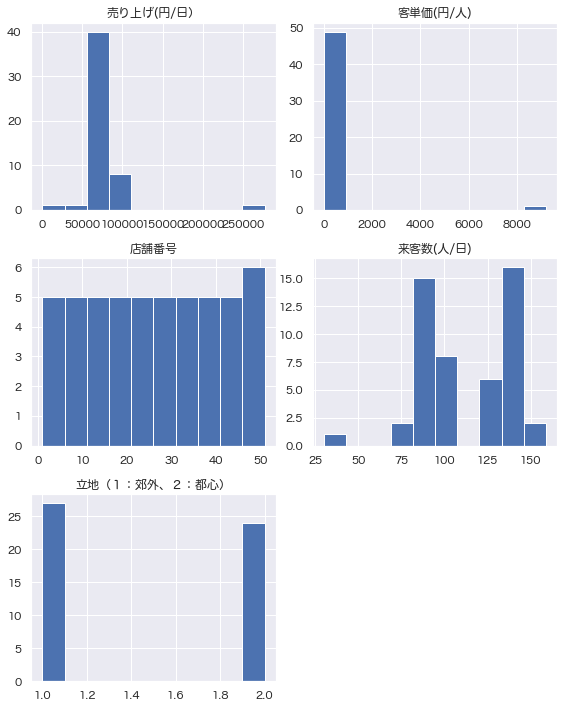

In [45]:
# グラフのサイズの調整
rcParams['figure.figsize'] = 8, 10
humberger_df.hist()
# グラフ同士が重ならないように
plt.tight_layout()

66923.076923     4
73846.153846     4
64615.384615     3
87692.307692     3
73076.923077     3
83846.153846     2
72307.692308     2
82307.692308     2
74615.384615     2
62307.692308     2
80769.230769     2
68461.538462     2
70769.230769     2
79230.769231     2
50769.230769     1
66153.846154     1
56923.076923     1
88461.538462     1
63846.153846     1
84615.384615     1
67692.307692     1
769.230769       1
65384.615385     1
57692.307692     1
76923.076923     1
86923.076923     1
276538.461538    1
78461.538462     1
69230.769231     1
80000.000000     1
Name: 売り上げ(円/日）, dtype: int64


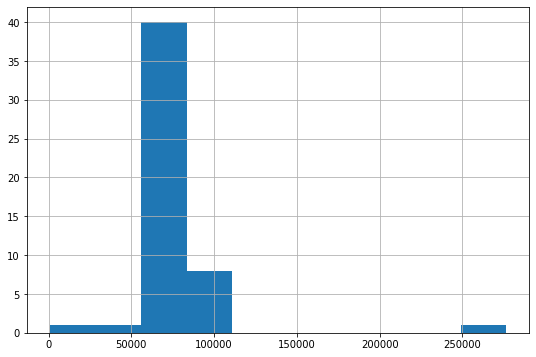

In [33]:
humberger_df['売り上げ(円/日）'].hist(bins=10, figsize=(9, 6))

/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30058 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31435 missing from curren

/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22770 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12370 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yusuke.watanabe/Documents/workspace/.venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20870 missing from current font.


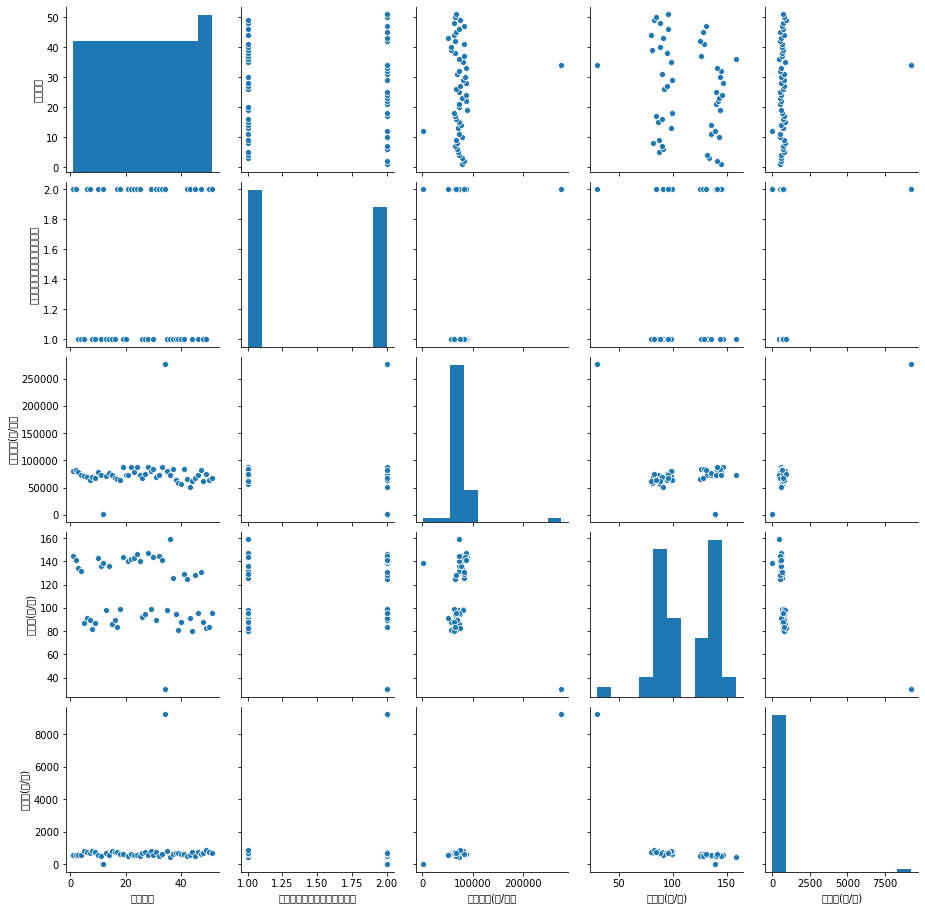

In [32]:
sns.pairplot(humberger_df, height=2.5);